In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [19]:
batch_size = 12

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [20]:
class MLP(nn.Module):
    def __init__(self, num_hidden_layers):
        super().__init__()
        self.in_dim = 28 * 28
        self.out_dim = 10

        dims = [self.in_dim, 512, 256, 128, 64, self.out_dim]
        self.linears = nn.ModuleList([
            nn.Linear(dims[i], dims[i + 1]) for i in range(len(dims) - 1)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, self.in_dim)
        for layer in self.linears[:-1]:
            x = self.relu(layer(x))
        return self.linears[-1](x)

In [21]:
def train(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    total = 0

    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        total += images.size(0)

    return running_loss / total


In [22]:
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [23]:
accuracies = []
layers = [2, 3, 4, 5]

for num_layers in layers:
    print(f"\nTraining {num_layers} number of layers")
    model = MLP(num_layers)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(3):
        epoch_loss = train(model, train_loader, optimizer, criterion)
        print(f"Epoch {epoch+1:2d} | Loss: {epoch_loss:.4f}")

    acc = evaluate(model, test_loader)
    accuracies.append(acc)
    print(f"Layers: {num_layers}, Accuracy: {acc:.4f}")



Training 2 number of layers
Epoch  1 | Loss: 0.2407
Epoch  2 | Loss: 0.1090
Epoch  3 | Loss: 0.0806
Layers: 2, Accuracy: 0.9723

Training 3 number of layers
Epoch  1 | Loss: 0.2484
Epoch  2 | Loss: 0.1099
Epoch  3 | Loss: 0.0793
Layers: 3, Accuracy: 0.9783

Training 4 number of layers
Epoch  1 | Loss: 0.2362
Epoch  2 | Loss: 0.1079
Epoch  3 | Loss: 0.0805
Layers: 4, Accuracy: 0.9745

Training 5 number of layers
Epoch  1 | Loss: 0.2315
Epoch  2 | Loss: 0.1080
Epoch  3 | Loss: 0.0801
Layers: 5, Accuracy: 0.9738


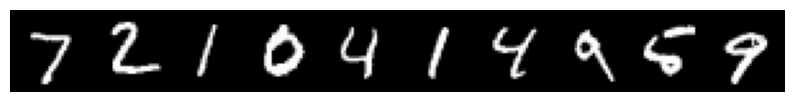

Ground Truth : 7 2 1 0 4 1 4 9 5 9
Predicted    : 7 2 1 0 4 1 4 9 5 9


In [31]:
# 이미지 시각화 함수
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(10, 2))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# 테스트 배치 중 첫 10개만 시각화
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images[:10]  # ✅ 10개만 선택

imshow(torchvision.utils.make_grid(images, nrow=10))  # ✅ 한 줄에 모두 배치

# 정답 및 예측 출력
print('Ground Truth :', ' '.join(f'{label.item()}' for label in labels[:10]))

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

print('Predicted    :', ' '.join(f'{pred.item()}' for pred in predicted))

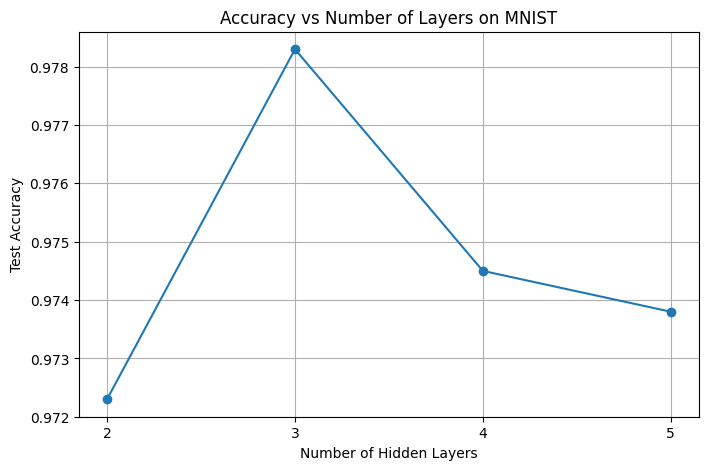

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(layers, accuracies, marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Number of Layers on MNIST')
plt.xticks(layers)
plt.grid(True)
plt.show()